## Observations and Insights 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [80]:
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [81]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [82]:
mouse_metadata.shape


(249, 5)

In [83]:
study_results.shape

(1893, 4)

In [84]:
# Checking the number of mice.
#make sure there are no duplicates in the mouse_metadata file
total_mouse = len((mouse_metadata["Mouse ID"]).unique())
total_mouse

249

In [85]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicated_study = study_results[study_results.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
Duplicated_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [86]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicated_study.shape


(10, 4)

In [87]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study = study_results.drop_duplicates(subset = ['Mouse ID','Timepoint'], keep = False)
clean_study.shape
#the keep = false means that we are dropping all rows associated with these duplicates

(1883, 4)

In [88]:
# Checking the number of mice in the clean DataFrame
total_mouse_clean = len((clean_study["Mouse ID"]).unique())
total_mouse_clean

249

In [89]:
# join the mouse_metadata and the clean_study into one dataframe for analysis purposes
clean_study_merge = pd.merge(clean_study, mouse_metadata, on="Mouse ID", how = "left")
clean_study_merge.shape

(1883, 8)

In [90]:
clean_study_merge.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [91]:
clean_study_merge.columns


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [92]:
clean_study_merge.dtypes


Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [93]:
clean_study_merge.rename(columns = {"Tumor Volume (mm3)":"TV"}, inplace = True)
clean_study_merge.columns

Index(['Mouse ID', 'Timepoint', 'TV', 'Metastatic Sites', 'Drug Regimen',
       'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

## Summary Statistics

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

clean_study_grouped = clean_study_merge.groupby(['Drug Regimen'])
#study_count = clean_study_grouped['Drug Regimen'].count()
#study_count
study_mean = clean_study_grouped['TV'].mean()
#study_mean
study_median = clean_study_grouped["TV"].median()
#study_median
study_var = clean_study_grouped["TV"].var()
#study_var
study_std = clean_study_grouped["TV"].std()

study_sem = clean_study_grouped["TV"].sem()


drug_regimen_properties = pd.DataFrame({"Mean":study_mean,
                                        "Median":study_median,
                                        "Variance":study_var,
                                        "Standard Deviation":study_std,
                                        "SEM":study_sem                                        
                                        })
drug_regimen_properties

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


clean_study_grouped['TV'].agg([np.mean, np.median, np.var, np.std, st.sem])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


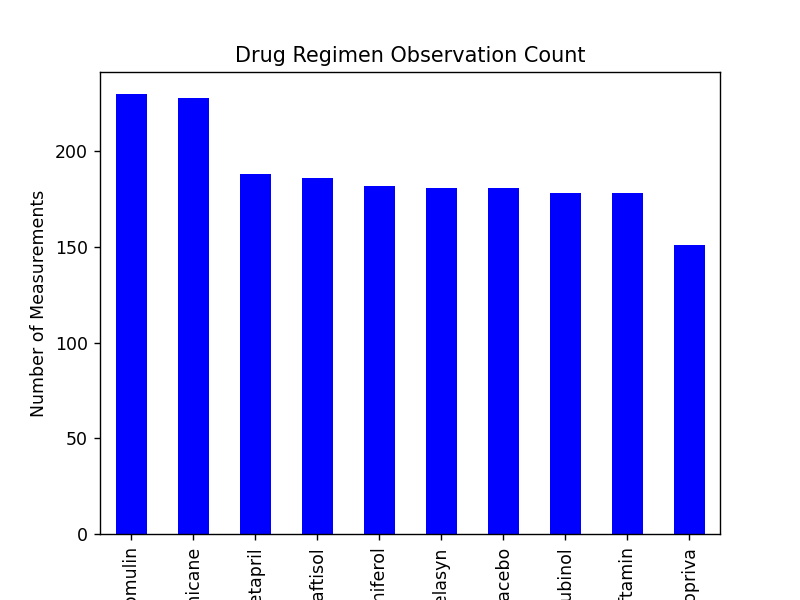

Text(0.5, 1.0, 'Drug Regimen Observation Count')

In [106]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

regimen_bar = clean_study_merge['Drug Regimen'].value_counts().plot.bar(color = 'blue', align = 'center')
regimen_bar.set_xlabel('Drug Regimen')
regimen_bar.set_ylabel('Number of Measurements')
regimen_bar.set_title('Drug Regimen Observation Count')



<IPython.core.display.Javascript object>


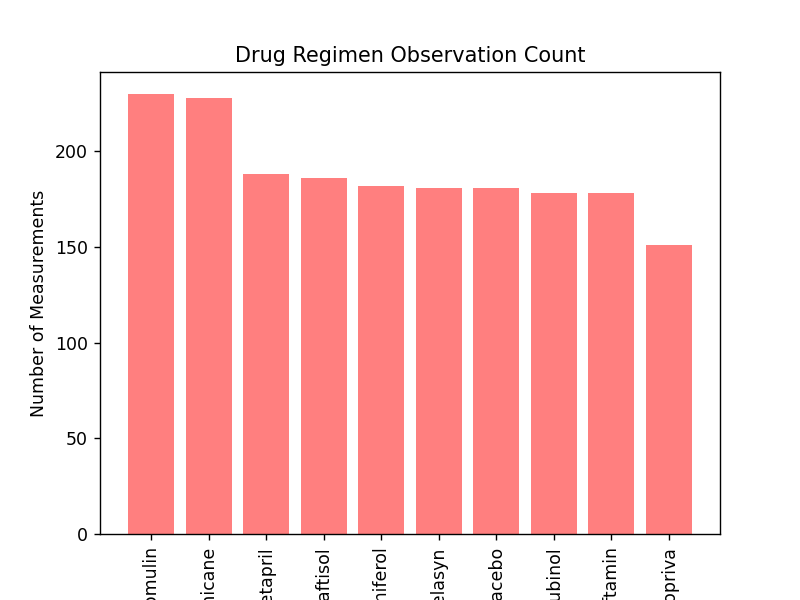

In [107]:
plt.savefig("Images/BarPandasObservations.png")
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


#determine the number of data points

y_axis = clean_study_merge['Drug Regimen'].value_counts()

x_axis = np.arange(len(y_axis))

plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_axis.index.values, rotation=90)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.title('Drug Regimen Observation Count')
plt.savefig("Images/BarObservations.png")
plt.show()


<IPython.core.display.Javascript object>


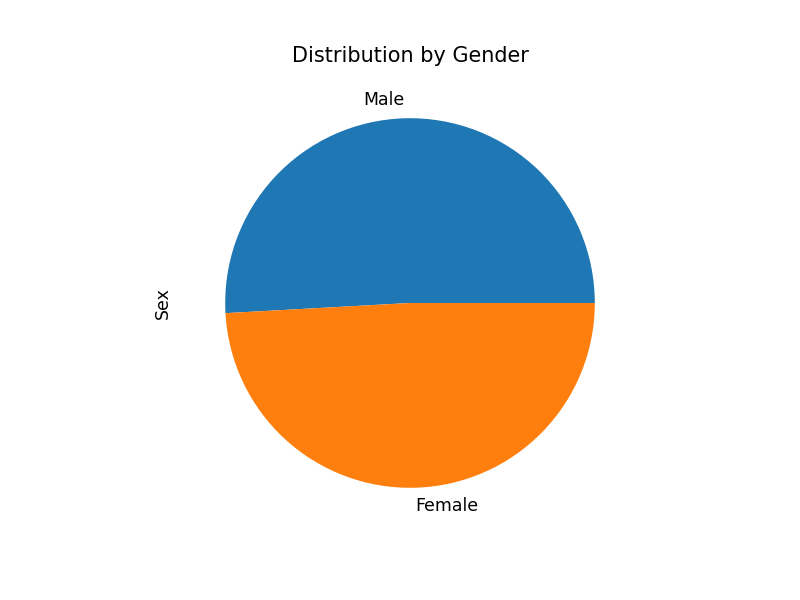

Text(0.5, 1.0, 'Distribution by Gender')

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_pie = clean_study_merge['Sex'].value_counts().plot.pie()
gender_pie.set_title('Distribution by Gender')

<IPython.core.display.Javascript object>


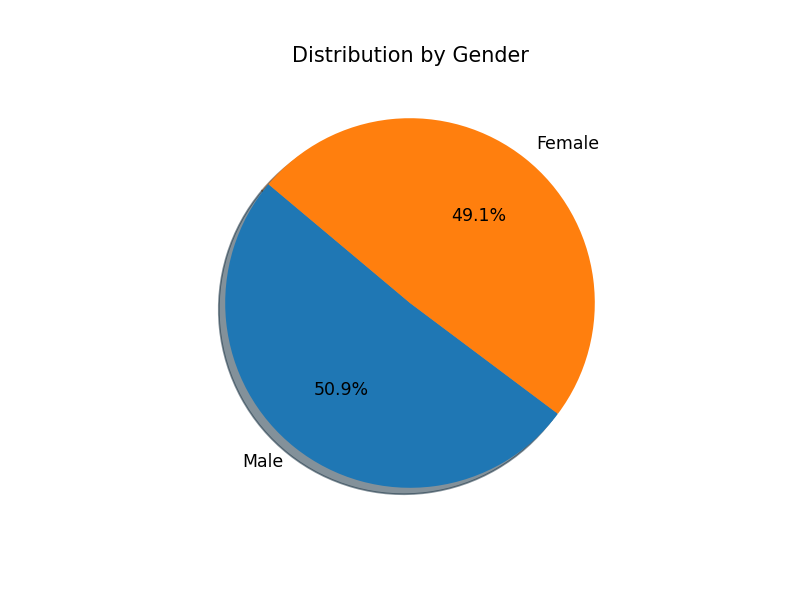

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# The values of each section of the pie chart
py_gender = clean_study_merge['Sex'].value_counts()

# Labels for the sections of our pie chart
labels = py_gender.index.values

plt.pie(py_gender,labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Distribution by Gender')

plt.show()

## Quartiles, Outliers and Boxplots

In [122]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Cap_df = clean_study_merge.loc[]
# Start by getting the last (greatest) timepoint for each mouse
Cap_final_timept = clean_study_merge.groupby('Mouse ID').max()['Timepoint']
final_timept




Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [123]:
#create a dataframe of each mouse and it's final timepoint
final_timepoint = pd.DataFrame(final_timept)

In [124]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_timepoint_merge= pd.merge(final_timepoint, clean_study_merge, on=('Mouse ID','Timepoint'), how='left')
final_timepoint_merge.head()

,Mouse ID,Timepoint,TV,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [142]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_analysis_df = pd.DataFrame({"Drug Regimen":treatments})

drug_analysis_df


,Drug Regimen
0,Capomulin
1,Ramicane
2,Infubinol
3,Ceftamin


In [145]:
#drop any Drug regimens that are not in the list of 4
drug_analysis_merge = pd.merge(drug_analysis_df, final_timepoint_merge, on="Drug Regimen",how = "left")
drug_analysis_merge.head()

,Drug Regimen,Mouse ID,Timepoint,TV,Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22


In [154]:
#working across all 4 regimens
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = drug_analysis_merge.quantile([.25,.5,.75], axis = 0)['TV']
print(quartiles)
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print("The interquartile range is: " + str(iqr))
print("The median of tumor volumes is: " +str(quartiles[.5]))

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound=lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")   

0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: TV, dtype: float64
The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range is: 22.74251795250001
The median of tumor volumes is: 45.0
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


<IPython.core.display.Javascript object>


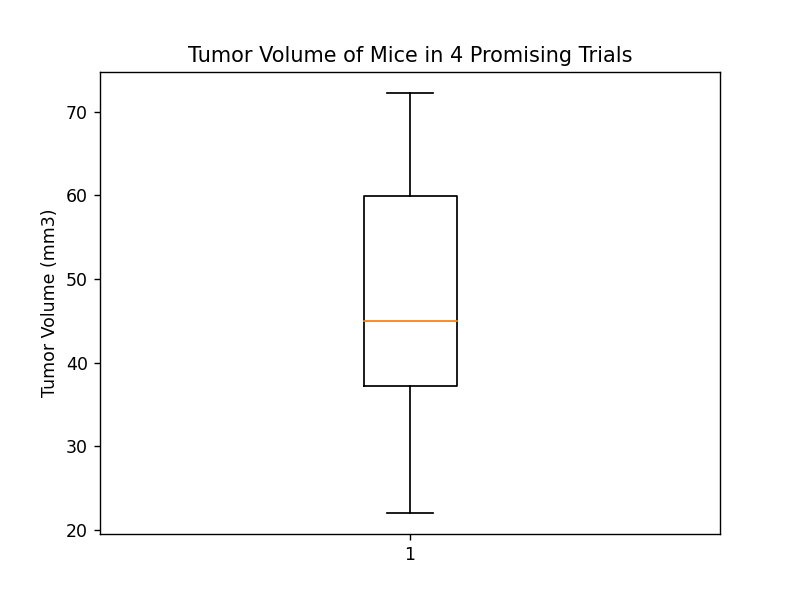

In [155]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice in 4 Promising Trials')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(drug_analysis_merge.TV)
plt.show()

Alternatively, calculate the IQR and outliers for each of 4 Regimens

[0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     38.125164
8     38.753265
9     41.483008
10    38.846876
11    28.430964
12    33.329098
13    46.539206
14    32.377357
15    41.581521
16    23.343598
17    40.728578
18    34.455298
19    31.023923
20    40.658124
21    39.952347
22    36.041047
23    28.484033
24    31.896238
Name: TV, dtype: float64]
[0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     38.125164
8     38.753265
9     41.483008
10    38.846876
11    28.430964
12    33.329098
13    46.539206
14    32.377357
15    41.581521
16    23.343598
17    40.728578
18    34.455298
19    31.023923
20    40.658124
21    39.952347
22    36.041047
23    28.484033
24    31.896238
Name: TV, dtype: float64, 25    38.407618
26    43.047543
27    38.810366
28    32.978522
29    38.342008
30    33.397653
31    37.311236
32    40.659006
33    29.128472
34

<IPython.core.display.Javascript object>


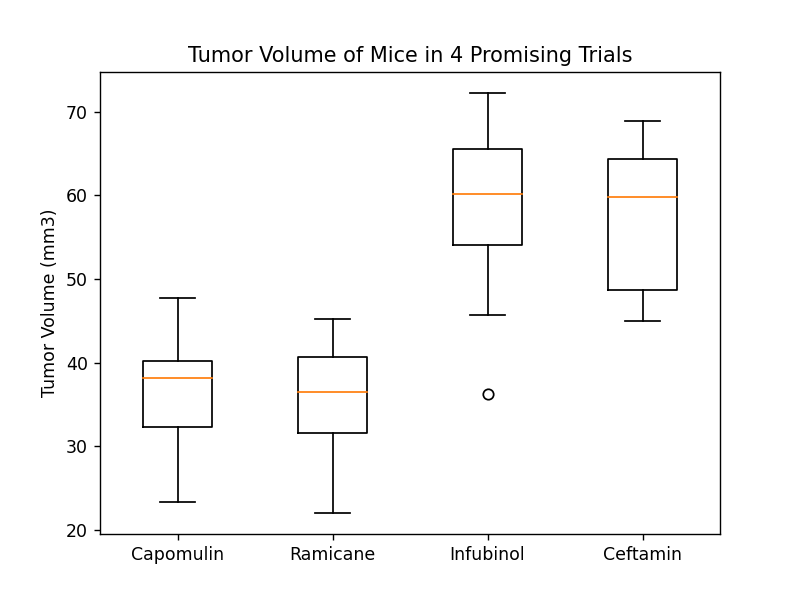

([<matplotlib.axis.XTick at 0x29382156dc0>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ceftamin')])

In [171]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for treatment in treatments:
    #reduce the dataset to match the treatment
    treatment_df = drug_analysis_merge.loc[drug_analysis_merge['Drug Regimen'] == treatment]
   
  
    values = treatment_df['TV']
    tumor_vol.append(values)
    print(tumor_vol)
    #calculate quartiles and IQR
    quartiles = treatment_df.quantile([.25,.5,.75], axis = 0)['TV']
 #   print(quartiles)
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq

    #print results
#    print(f"The lower quartile of tumor volume is: {lowerq} for regimen: {treatment}.")
#    print(f"The upper quartile of tumor volume is: {upperq} for regimen: {treatment}.")
#    print("The interquartile range is: " + str(iqr) + "for regimen: " + treatment)
#    print("The median of tumor volumes is: " +str(quartiles[.5]) +"for regiment: " + treatment)
   
    # Determine outliers using upper and lower bounds
    lower_bound=lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#    print(f"Values below {lower_bound} could be outliers.")
#    print(f"Values above {upper_bound} could be outliers.")  
    

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol)

#add title and labels
plt.title('Tumor Volume of Mice in 4 Promising Trials')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks([1,2,3,4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
    
    

## Line and Scatter Plots

In [212]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#import the linear regression method
from scipy.stats import linregress
from matplotlib import pyplot as plt

#select a mouse (b128) and create a dataframe with just that mouse's data
line_df = clean_study_merge.loc[clean_study_merge['Mouse ID'] == 'b128']
line_df.dtypes
#line_df.shape

Mouse ID             object
Timepoint             int64
TV                  float64
Metastatic Sites      int64
Drug Regimen         object
Sex                  object
Age_months            int64
Weight (g)            int64
dtype: object

0        0
468      5
674     10
713     15
925     20
1258    25
1390    30
1537    35
1619    40
1754    45
Name: Timepoint, dtype: int64
0       45.000000
468     45.651331
674     43.270852
713     43.784893
925     42.731552
1258    43.262145
1390    40.605335
1537    37.967644
1619    38.379726
1754    38.982878
Name: TV, dtype: float64
0       45.797621
468     44.945624
674     44.093627
713     43.241631
925     42.389634
1258    41.537637
1390    40.685641
1537    39.833644
1619    38.981647
1754    38.129650
Name: Timepoint, dtype: float64
y = -0.17x + 45.8


<IPython.core.display.Javascript object>


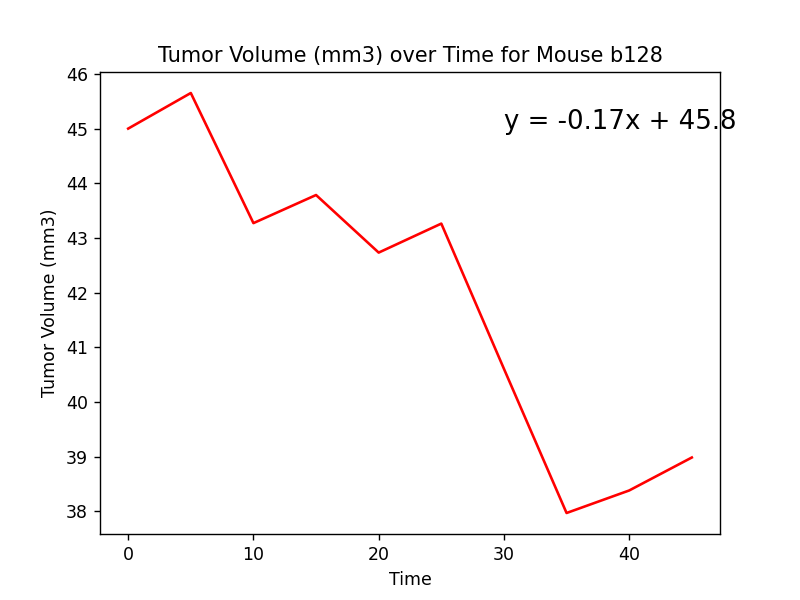

In [226]:
x_time = []
y_TV = []

#set the value of the x axis as time
x_time = line_df['Timepoint']
print(x_time)
#set the value of the y axis as the tumor volume
y_TV = line_df['TV']
print(y_TV)

#perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_time, y_TV)
regress_values = x_time * slope + intercept
print(regress_values)

#write out the formula for the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

#plot the line
#plt.scatter(x_time,y_TV)
plt.plot(x_time,y_TV, "r-")
plt.annotate(line_eq,(30,45),fontsize=15,color="black")
plt.xlabel('Time')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume (mm3) over Time for Mouse b128')
plt.show()


<IPython.core.display.Javascript object>


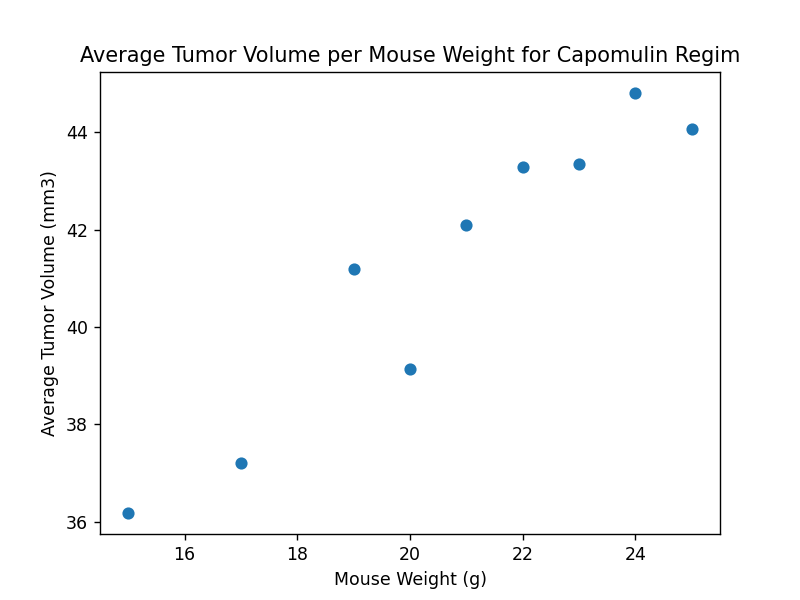

In [230]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regim
x_values = []
y_values = []

#create a dataframe with all of the data for the Capomulin regim 
treatment_df_Capomulin = clean_study_merge.loc[clean_study_merge['Drug Regimen'] == "Capomulin"]
treatment_df_Capomulin.shape  #230 records

#organize the data by weight
grouped_Capomulin = treatment_df_Capomulin.groupby(['Weight (g)'])

#store the average tumor volume per group in the y
y_values = grouped_Capomulin.mean()['TV']
y_values

#store the weight in the x 
x_values = y_values.index.values
x_values

#graph
plt.scatter(x_values,y_values)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume per Mouse Weight for Capomulin Regim')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


<IPython.core.display.Javascript object>


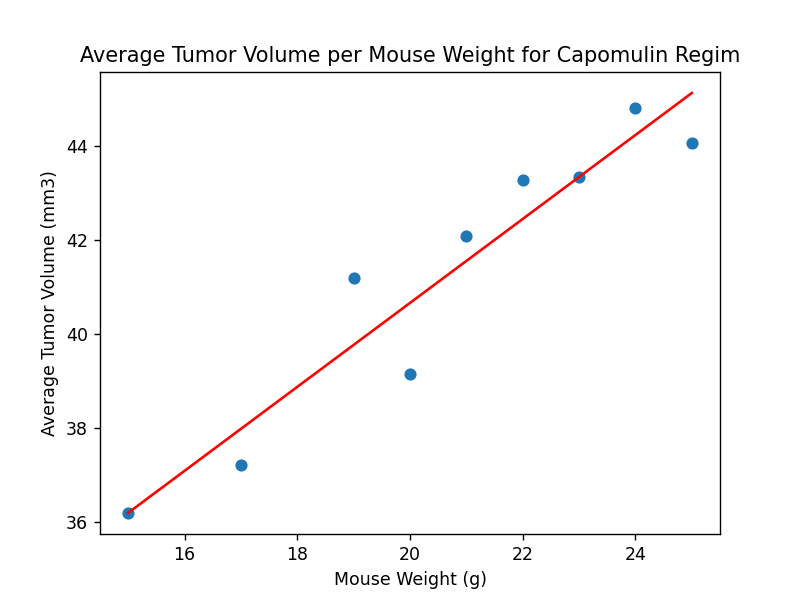

In [232]:
#calculate and graph the linear regression
plt.scatter(x_values,y_values)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume per Mouse Weight for Capomulin Regim')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")

plt.show()

#this content has a positive correlation between average tumor volume and mouse weight

In [234]:
#calculate pearsons:
pearsons = round(st.pearsonr(x_values, y_values)[0],2)
print(pearsons)

0.95


since r > .7 there is a strong correlation so my prediction is correct